## **FILMSKA ANALITIKA**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# da se grafovi prikazuju u notebooku
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [5]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
from scipy import stats
import numpy as np

df.shape

df.info()

df.describe()  # osnovne statistike za brojčane kolone

#stats.describe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
cols = ["Series_Title", "Released_Year", "Genre", "IMDB_Rating", "No_of_Votes", "Director"]
df_simple = df[cols].copy()
df_simple.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,No_of_Votes,Director
0,The Shawshank Redemption,1994,Drama,9.3,2343110,Frank Darabont
1,The Godfather,1972,"Crime, Drama",9.2,1620367,Francis Ford Coppola
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,2303232,Christopher Nolan
3,The Godfather: Part II,1974,"Crime, Drama",9.0,1129952,Francis Ford Coppola
4,12 Angry Men,1957,"Crime, Drama",9.0,689845,Sidney Lumet


Analiza 1 - Top 10 filmova po ratingu

In [10]:
top10 = df_simple.sort_values(by="IMDB_Rating", ascending = False).head(10)
top10[["Series_Title","Released_Year","IMDB_Rating"]]

,Series_Title,Released_Year,IMDB_Rating
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
4,12 Angry Men,1957,9.0
2,The Dark Knight,2008,9.0
3,The Godfather: Part II,1974,9.0
5,The Lord of the Rings: The Return of the King,2003,8.9
7,Schindler's List,1993,8.9
6,Pulp Fiction,1994,8.9
8,Inception,2010,8.8
12,"Il buono, il brutto, il cattivo",1966,8.8


Analiza 2 - broj filmova po godini

In [20]:
movies_per_year = df_simple["Released_Year"].value_counts().sort_index()
movies_per_year

,count
Released_Year,
1920,1
1921,1
1922,1
1924,1
1925,2
...,...
2017,22
2018,19
2019,23


Analiza 3 - Žanrovi

In [21]:
df_simple["Main_Genre"] = df_simple["Genre"].str.split(",").str[0].str.strip()
df_simple[["Series_Title", "Genre", "Main_Genre"]].tail()

,Series_Title,Genre,Main_Genre
995,Breakfast at Tiffany's,"Comedy, Drama, Romance",Comedy
996,Giant,"Drama, Western",Drama
997,From Here to Eternity,"Drama, Romance, War",Drama
998,Lifeboat,"Drama, War",Drama
999,The 39 Steps,"Crime, Mystery, Thriller",Crime


In [22]:
movies_per_genre = df_simple["Main_Genre"].value_counts()
movies_per_genre

,count
Main_Genre,
Drama,289
Action,172
Comedy,155
Crime,107
Biography,88
Animation,82
Adventure,72
Mystery,12
Horror,11


Broj filmova po žanru

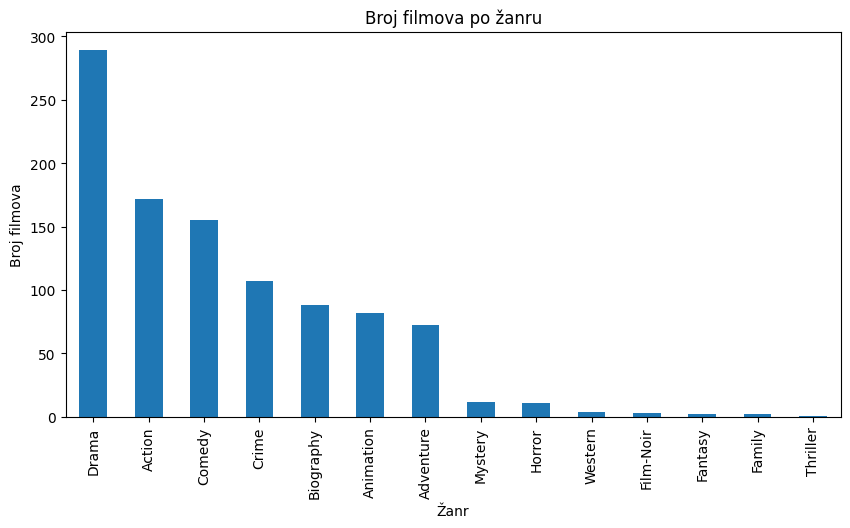

In [32]:
movies_per_genre.plot(kind="bar", figsize=(10,5))
plt.title("Broj filmova po žanru")
plt.xlabel("Žanr")
plt.ylabel("Broj filmova")
plt.savefig("broj_filmova_po_zanru.png", dpi=300, bbox_inches='tight')
plt.show()

Broj filmova po godinama

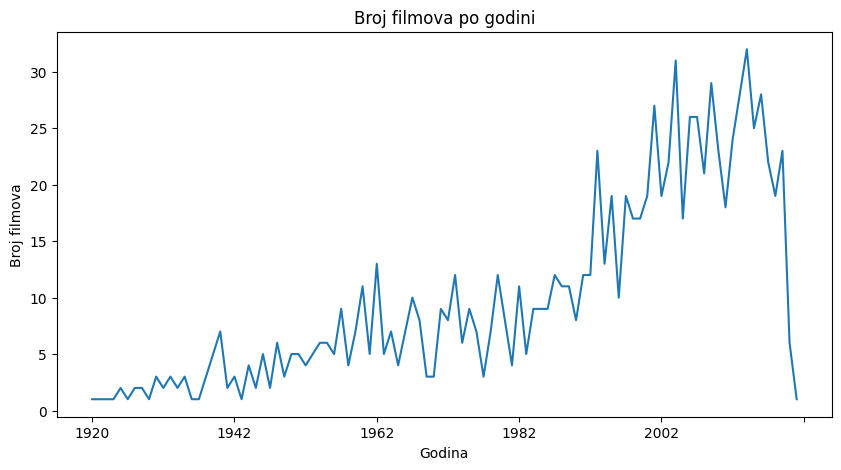

In [33]:
movies_per_year.plot(kind="line", figsize=(10,5))
plt.title("Broj filmova po godini")
plt.xlabel("Godina")
plt.ylabel("Broj filmova")
plt.savefig("broj_filmova_po_godini.png", dpi=300, bbox_inches='tight')
plt.show()

Top režiseri (po broju filmova)

In [25]:
directors_count = df_simple["Director"].value_counts().head(10)
directors_count

,count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Akira Kurosawa,10
Martin Scorsese,10
Woody Allen,9
Stanley Kubrick,9
Billy Wilder,9
Clint Eastwood,8


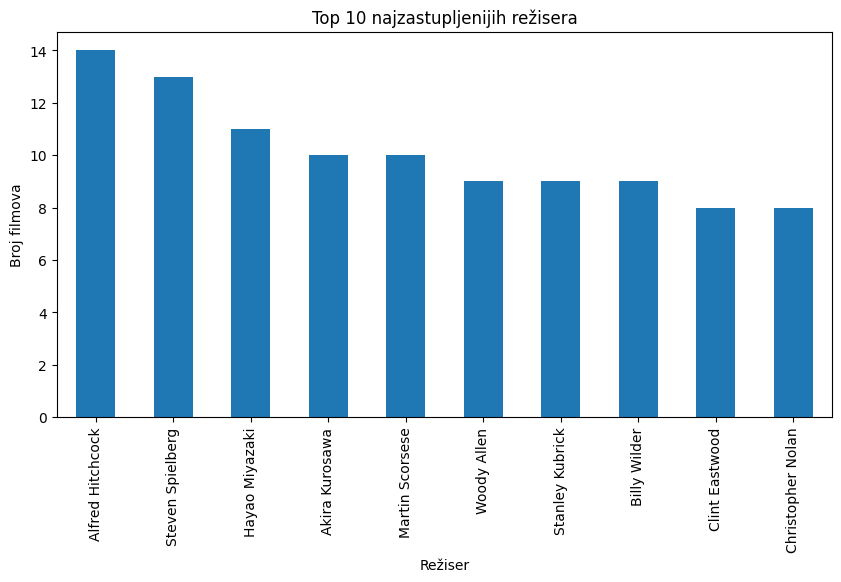

In [34]:
directors_count.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 najzastupljenijih režisera")
plt.xlabel("Režiser")
plt.ylabel("Broj filmova")
plt.savefig("top10_najzastupljenijih_rezisera.png", dpi=300, bbox_inches='tight')
plt.show()

Prosječan rating po žanru

In [27]:
avg_rating_genre = df_simple.groupby("Main_Genre")["IMDB_Rating"].mean().sort_values(ascending=False)
avg_rating_genre

,IMDB_Rating
Main_Genre,
Western,8.350000
Crime,8.016822
Fantasy,8.000000
Mystery,7.975000
Film-Noir,7.966667
Drama,7.957439
Action,7.949419
Biography,7.938636
Adventure,7.937500


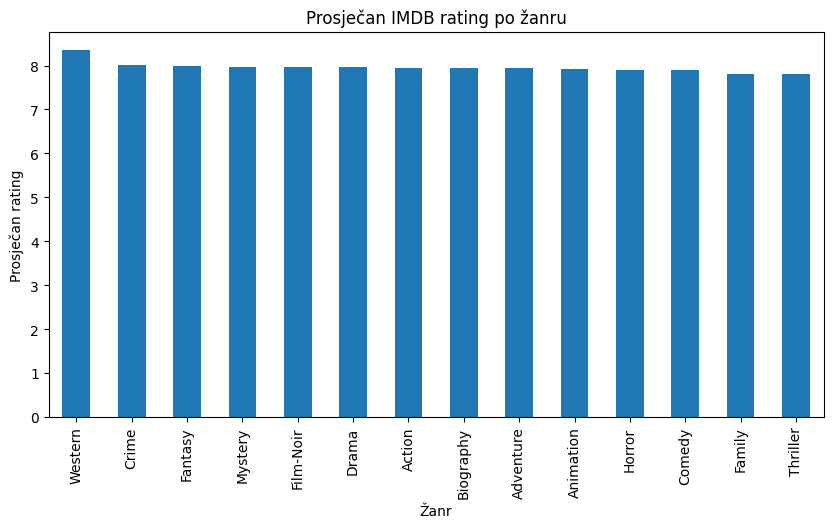

In [35]:
avg_rating_genre.plot(kind="bar", figsize=(10,5))
plt.title("Prosječan IMDB rating po žanru")
plt.xlabel("Žanr")
plt.ylabel("Prosječan rating")
plt.savefig("prosjecan_IMDB_rating_po_zanru.png", dpi=300, bbox_inches='tight')
plt.show()

Top filmovi po broju glasova

In [29]:
top_votes = df_simple.sort_values(by="No_of_Votes", ascending=False).head(10)
top_votes[["Series_Title", "No_of_Votes"]]

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110
2,The Dark Knight,2303232
8,Inception,2067042
9,Fight Club,1854740
6,Pulp Fiction,1826188
11,Forrest Gump,1809221
14,The Matrix,1676426
10,The Lord of the Rings: The Fellowship of the Ring,1661481
5,The Lord of the Rings: The Return of the King,1642758
1,The Godfather,1620367


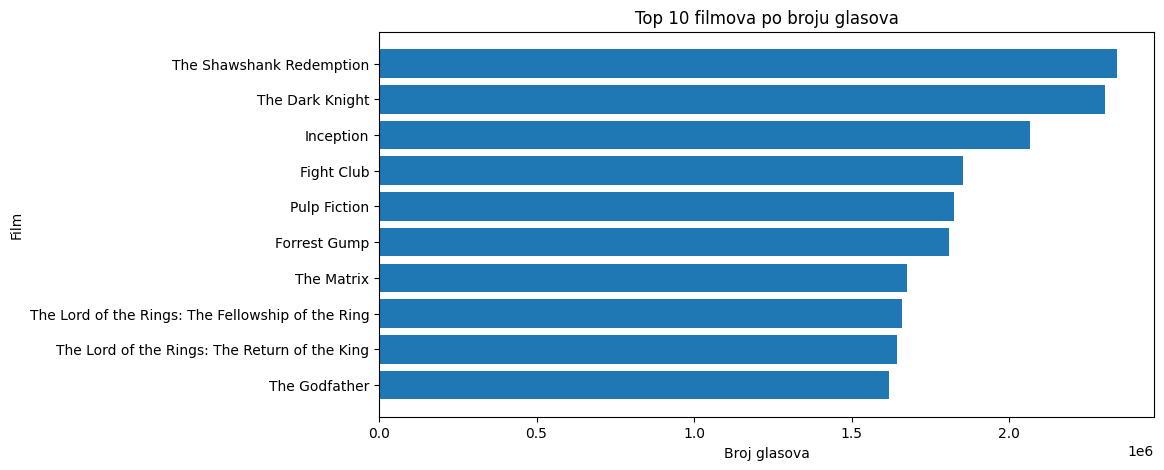

In [36]:
plt.figure(figsize=(10,5))
plt.barh(top_votes["Series_Title"], top_votes["No_of_Votes"])
plt.title("Top 10 filmova po broju glasova")
plt.xlabel("Broj glasova")
plt.ylabel("Film")
plt.gca().invert_yaxis()
plt.savefig("top10_filmova_po_broju_glasova.png", dpi=300, bbox_inches='tight')
plt.show()

Prosječan rating po godini

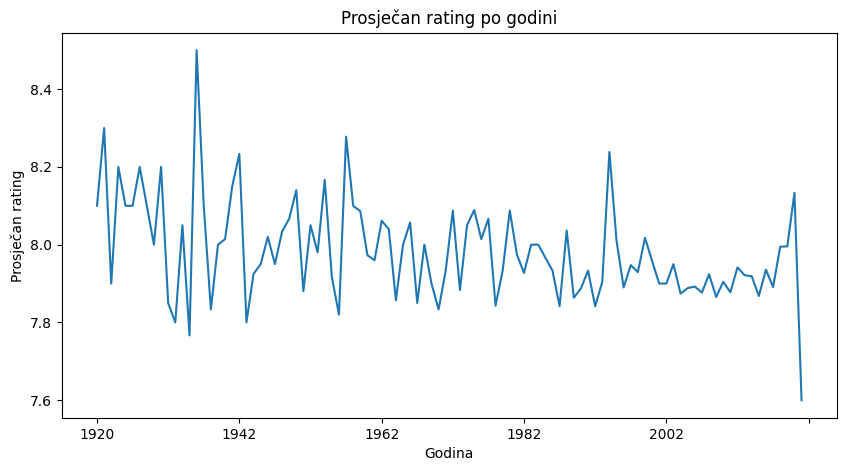

In [37]:
rating_per_year = df_simple.groupby("Released_Year")["IMDB_Rating"].mean()
rating_per_year.plot(figsize=(10,5))
plt.title("Prosječan rating po godini")
plt.xlabel("Godina")
plt.ylabel("Prosječan rating")
plt.savefig("prosjecan_rating_po_godini.png", dpi=300, bbox_inches='tight')
plt.show()

## Zaključci / Insights

- Drama i Crime dominiraju kao najzastupljeniji žanrovi.
- Prosječan rating je najviši kod žanrova kao što su Documentary, Biography i Western.
- Produkcija filmova naglo raste nakon 1990-ih.
- Najpopularniji filmovi po broju glasova imaju preko 1–2 milijuna glasova (The Shawshank Redemption, The Dark Knight, Inception…).
- Neki režiseri (Christopher Nolan, Quentin Tarantino…) se pojavljuju više puta u top analizama.
